In [1]:
import pandas as pd
import numpy as np

In [2]:
glass= pd.read_csv("D:\\Data Science-ExcelR\\Assignments\\KNN\\glass.csv")

In [3]:
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [4]:
data = glass.describe()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      8 non-null      float64
 1   Na      8 non-null      float64
 2   Mg      8 non-null      float64
 3   Al      8 non-null      float64
 4   Si      8 non-null      float64
 5   K       8 non-null      float64
 6   Ca      8 non-null      float64
 7   Ba      8 non-null      float64
 8   Fe      8 non-null      float64
 9   Type    8 non-null      float64
dtypes: float64(10)
memory usage: 704.0+ bytes


In [6]:
def norm_fumc(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
norm = norm_fumc(glass.iloc[:,0:9])
glass1 = glass.iloc[:,9]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(norm,glass1,test_size = 0.4,stratify = glass1)

In [9]:
glass["Type"].value_counts()
y_train.value_counts()
y_test.value_counts()

2    30
1    28
7    12
3     7
5     5
6     4
Name: Type, dtype: int64

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KN

model = KN(n_neighbors = 5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
train_accuracy = np.mean(model.predict(x_train)==y_train)
train_accuracy

0.7109375

In [12]:
test_accuracy = np.mean(model.predict(x_test)==y_test)
test_accuracy

0.6627906976744186

In [14]:
model2 = KN(n_neighbors = 9)
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [16]:
train_two = np.mean(model2.predict(x_train)==y_train)
train_two

0.6953125

In [17]:
test_two = np.mean(model2.predict(x_test)==y_test)
test_two

0.627906976744186

In [18]:
acc = []

In [19]:
for i in range (4,30,1):
    model = KN(n_neighbors = i)
    model.fit(x_train,y_train)
    train_acc = np.mean(model.predict(x_train)==y_train)
    test_acc = np.mean(model.predict(x_test)==y_test)
    acc.append([train_acc, test_acc])

In [21]:
acc

[[0.734375, 0.6976744186046512],
 [0.7109375, 0.6627906976744186],
 [0.6953125, 0.6395348837209303],
 [0.7109375, 0.6511627906976745],
 [0.6875, 0.6162790697674418],
 [0.6953125, 0.627906976744186],
 [0.6796875, 0.6627906976744186],
 [0.6875, 0.6511627906976745],
 [0.703125, 0.6627906976744186],
 [0.6640625, 0.627906976744186],
 [0.671875, 0.6395348837209303],
 [0.671875, 0.6395348837209303],
 [0.671875, 0.6046511627906976],
 [0.6640625, 0.6046511627906976],
 [0.65625, 0.5930232558139535],
 [0.6484375, 0.5813953488372093],
 [0.6328125, 0.5697674418604651],
 [0.6328125, 0.5930232558139535],
 [0.625, 0.5930232558139535],
 [0.6171875, 0.5697674418604651],
 [0.6171875, 0.5465116279069767],
 [0.6015625, 0.5348837209302325],
 [0.609375, 0.5581395348837209],
 [0.6171875, 0.5697674418604651],
 [0.609375, 0.5697674418604651],
 [0.59375, 0.5465116279069767]]

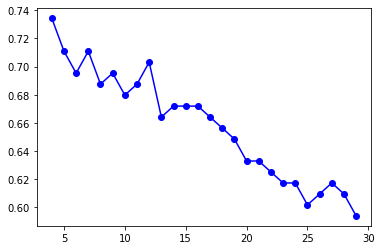

In [22]:
import matplotlib.pyplot as plt

plt.plot(np.arange(4,30,1),[i[0] for i in acc],'bo-')

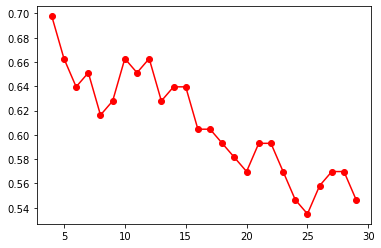

In [23]:
plt.plot(np.arange(4,30,1),[i[1] for i in acc],'ro-')

In [25]:
model3 = KN(n_neighbors = 6)
model3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [26]:
pred_train = model3.predict(x_train)
cross_tab = pd.crosstab(y_train,pred_train)

In [27]:
train_accuracy = np.mean(pred_train == y_train)
train_accuracy

0.6953125

In [28]:
pred_test = model3.predict(x_test)
cross_tab_test = pd.crosstab(y_test,pred_test)

In [29]:
test_accuracy=np.mean(pred_test ==y_test)
test_accuracy

0.6395348837209303